# Titanic - Machine Learning from Disaster

This competiton is to use machine larning to create a model that predicts which passenger survived the Titanic shipwreck 

## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


## Preprocess the Data

In [4]:
# Read and load the dataset.
df = pd.read_csv('medical.csv')
df["Age"]

0      67
1      63
2      21
3      38
4      42
       ..
145    57
146    39
147    77
148    39
149    88
Name: Age, Length: 150, dtype: int64

In [5]:
# Describe the dataset to ensure the dataset is being correctly read.
df.describe()

,Patient_ID,Age,Chronic_Conditions,Hospital_Visits_Last_Year,Readmission
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,54.093333,2.506667,7.806667,0.526667
std,43.445368,19.830945,1.649676,4.844836,0.500961
min,1.000000,18.000000,0.000000,0.000000,0.000000
25%,38.250000,38.000000,1.000000,4.000000,0.000000
50%,75.500000,54.500000,2.000000,8.000000,1.000000
75%,112.750000,67.750000,4.000000,12.000000,1.000000
max,150.000000,89.000000,5.000000,15.000000,1.000000


In [5]:
# Check for null values.
df.isnull().sum()

Patient_ID                   0
Age                          0
Gender                       0
Ethnicity                    0
Housing_Status               0
Income_Level                 0
Education_Level              0
Food_Security                0
Chronic_Conditions           0
Hospital_Visits_Last_Year    0
Readmission                  0
dtype: int64

In [6]:
#Since there are no null values, no need to handle or drop missing values.

# Encode categorical columns to numerical columns to avoid problems during later uses.
categorical_cols = ['Gender', 'Ethnicity', 'Housing_Status', 'Income_Level', 'Education_Level', 'Food_Security']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future decoding.

## Exploratory Data Analysis

In [7]:
# Check readmission rate.
readmission_rate = df['Readmission'].mean()
print(f"The overall readmission rate is: {readmission_rate:.2%}")

reverse_mappings = {col: {i: label for i, label in enumerate(le.classes_)} for col, le in label_encoders.items()} 
# This is to ensure that the categorical columns we earlier transformed to numerical are reversed to their original form so output can be read easily as the original labels and not as the numbers offered by the label endocder.

# Readmission by Age Group.
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 17, 24, 60, 120], labels=['Minors','Young adults','Adults', 'Elderly/Senior'])
age_readmission = df.groupby('Age_Group', observed=True)['Readmission'].mean().sort_values()
print("\nThe readmission rate by age group is:\n", age_readmission)

# Readmission by Chronic Conditions.
chronic_readmission = df.groupby('Chronic_Conditions', observed=True)['Readmission'].mean().sort_values()
print("\nThe readmission rate by chronic conditions is:\n", chronic_readmission)

# Readmission by Income Level.
income_readmission = df.groupby('Income_Level', observed=True)['Readmission'].mean().sort_values()
income_readmission.index = income_readmission.index.map(reverse_mappings['Income_Level'])
print("\nThe readmission rate by income level is:\n", income_readmission)

# Readmission by Housing Status.
housing_readmission = df.groupby('Housing_Status', observed=True)['Readmission'].mean().sort_values()
housing_readmission.index = housing_readmission.index.map(reverse_mappings['Housing_Status'])
print("\nThe readmission rate by housing status is:\n", housing_readmission)

# Readmission by Education Level.
education_readmission = df.groupby('Education_Level', observed=True)['Readmission'].mean().sort_values()
education_readmission.index = education_readmission.index.map(reverse_mappings['Education_Level'])
print("\nThe readmission rate by education level is:\n", education_readmission)

# Readmission by Gender.
gender_readmission = df.groupby('Gender', observed=True)['Readmission'].mean().sort_values()
gender_readmission.index = gender_readmission.index.map(reverse_mappings['Gender'])
print("\nThe readmission rate by gender is:\n", gender_readmission)

# Readmission by Food Security.
food_readmission = df.groupby('Food_Security', observed=True)['Readmission'].mean().sort_values()
food_readmission.index = food_readmission.index.map(reverse_mappings['Food_Security'])
print("\nThe readmission rate by food security is:\n", food_readmission)

# Readmission by Ethnicity.
ethnicity_readmission = df.groupby('Ethnicity', observed=True)['Readmission'].mean().sort_values()
ethnicity_readmission.index = ethnicity_readmission.index.map(reverse_mappings['Ethnicity'])
print("\nThe readmission rate by ethnicity is:\n", ethnicity_readmission)

# Readmission considering how many times they went to the hospital last year.
hospital_visits_last_year_readmission = df.groupby('Hospital_Visits_Last_Year', observed=True)['Readmission'].mean().sort_values()
print("\nThe readmission rate based on how many times the hospital was visited last year is:\n", hospital_visits_last_year_readmission)

The overall readmission rate is: 52.67%

The readmission rate by age group is:
 Age_Group
Young adults      0.250000
Adults            0.533333
Elderly/Senior    0.571429
Name: Readmission, dtype: float64

The readmission rate by chronic conditions is:
 Chronic_Conditions
3    0.400000
1    0.428571
2    0.535714
0    0.571429
4    0.575758
5    0.650000
Name: Readmission, dtype: float64

The readmission rate by income level is:
 Income_Level
Low       0.48
Medium    0.52
High      0.58
Name: Readmission, dtype: float64

The readmission rate by housing status is:
 Housing_Status
Homeless    0.462963
Unstable    0.487179
Stable      0.614035
Name: Readmission, dtype: float64

The readmission rate by education level is:
 Education_Level
Less than high school    0.400000
College degree           0.523810
High school diploma      0.547619
Postgraduate             0.645161
Name: Readmission, dtype: float64

The readmission rate by gender is:
 Gender
Male      0.475000
Other     0.500000
Fem

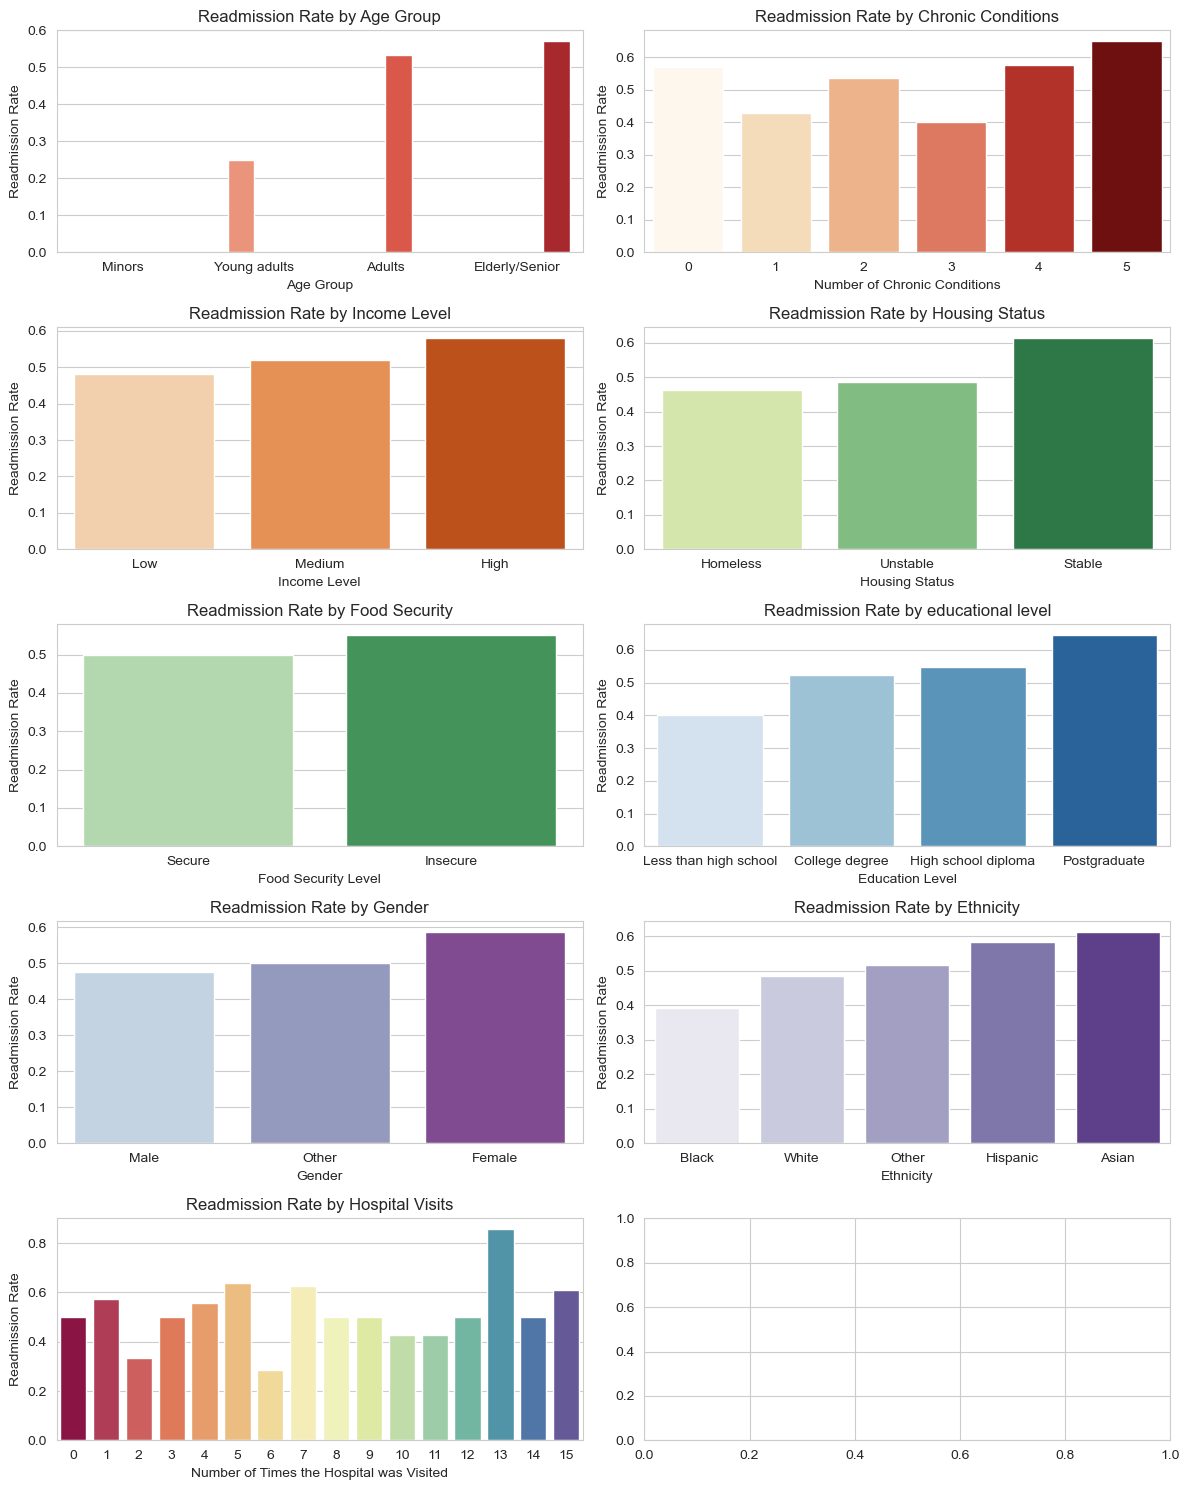

In [12]:
# Represent the above information in the form of grouped barcharts for easier understanding. 
sns.set_style("whitegrid")

# Define the figures for subplots.
fig, axes = plt.subplots(5, 2, figsize=(12, 15))  # 5 rows, 2 columns.

# Bar Chart: Readmission Rate by Age Group.
sns.barplot(x=age_readmission.index, y=age_readmission.values, hue=age_readmission.index, palette="Reds", ax=axes[0, 0], legend=False)
axes[0, 0].set_title("Readmission Rate by Age Group")
axes[0, 0].set_xlabel("Age Group")
axes[0, 0].set_ylabel("Readmission Rate")

# Bar Chart: Readmission Rate by Chronic Conditions.
sns.barplot(x=chronic_readmission.index, y=chronic_readmission.values, hue=chronic_readmission.index, palette="OrRd", ax=axes[0, 1], legend=False)
axes[0, 1].set_title("Readmission Rate by Chronic Conditions")
axes[0, 1].set_xlabel("Number of Chronic Conditions")
axes[0, 1].set_ylabel("Readmission Rate")

# Bar Chart: Readmission Rate by Income Level.
sns.barplot(x=income_readmission.index, y=income_readmission.values, hue=income_readmission.index, palette="Oranges", ax=axes[1, 0], legend=False)
axes[1, 0].set_title("Readmission Rate by Income Level")
axes[1, 0].set_xlabel("Income Level")
axes[1, 0].set_ylabel("Readmission Rate")

# Bar Chart: Readmission Rate by Housing Status.
sns.barplot(x=housing_readmission.index, y=housing_readmission.values, hue=housing_readmission.index, palette="YlGn", ax=axes[1, 1], legend=False)
axes[1, 1].set_title("Readmission Rate by Housing Status")
axes[1, 1].set_xlabel("Housing Status")
axes[1, 1].set_ylabel("Readmission Rate")

# Bar Chart: Readmission Rate by Food Security.
sns.barplot(x=food_readmission.index, y=food_readmission.values, hue=food_readmission.index, palette="Greens", ax=axes[2, 0], legend=False)
axes[2, 0].set_title("Readmission Rate by Food Security")
axes[2, 0].set_xlabel("Food Security Level")
axes[2, 0].set_ylabel("Readmission Rate")

# Bar Chart: Readmission Rate by Education Level.
sns.barplot(x=education_readmission.index, y=education_readmission.values, hue=education_readmission.index, palette="Blues", ax=axes[2, 1], legend=False)
axes[2, 1].set_title("Readmission Rate by educational level")
axes[2, 1].set_xlabel("Education Level")
axes[2, 1].set_ylabel("Readmission Rate")

# Bar Chart: Readmission Rate by Gender.
sns.barplot(x=gender_readmission.index, y=gender_readmission.values, hue=gender_readmission.index, palette="BuPu", ax=axes[3, 0], legend=False)
axes[3, 0].set_title("Readmission Rate by Gender")
axes[3, 0].set_xlabel("Gender")
axes[3, 0].set_ylabel("Readmission Rate")

# Bar Chart: Readmission Rate by Ethnicity.
sns.barplot(x=ethnicity_readmission.index, y=ethnicity_readmission.values, hue=ethnicity_readmission.index, palette="Purples", ax=axes[3, 1], legend=False)
axes[3, 1].set_title("Readmission Rate by Ethnicity")
axes[3, 1].set_xlabel("Ethnicity")
axes[3, 1].set_ylabel("Readmission Rate")

# Bar Chart: Readmission Rate by Hospital Visits the Previous Year.
sns.barplot(x=hospital_visits_last_year_readmission.index, y=hospital_visits_last_year_readmission.values, hue=hospital_visits_last_year_readmission.index, palette="Spectral", ax=axes[4, 0], legend=False)
axes[4, 0].set_title("Readmission Rate by Hospital Visits")
axes[4, 0].set_xlabel("Number of Times the Hospital was Visited")
axes[4, 0].set_ylabel("Readmission Rate")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### Correlation Analysis


Correlation of Features with Readmission:
 Readmission                  1.000000
Age                          0.107162
Chronic_Conditions           0.072873
Hospital_Visits_Last_Year    0.058826
Education_Level              0.036888
Housing_Status               0.032482
Patient_ID                  -0.026674
Ethnicity                   -0.048738
Income_Level                -0.049060
Food_Security               -0.051314
Gender                      -0.075549
Name: Readmission, dtype: float64


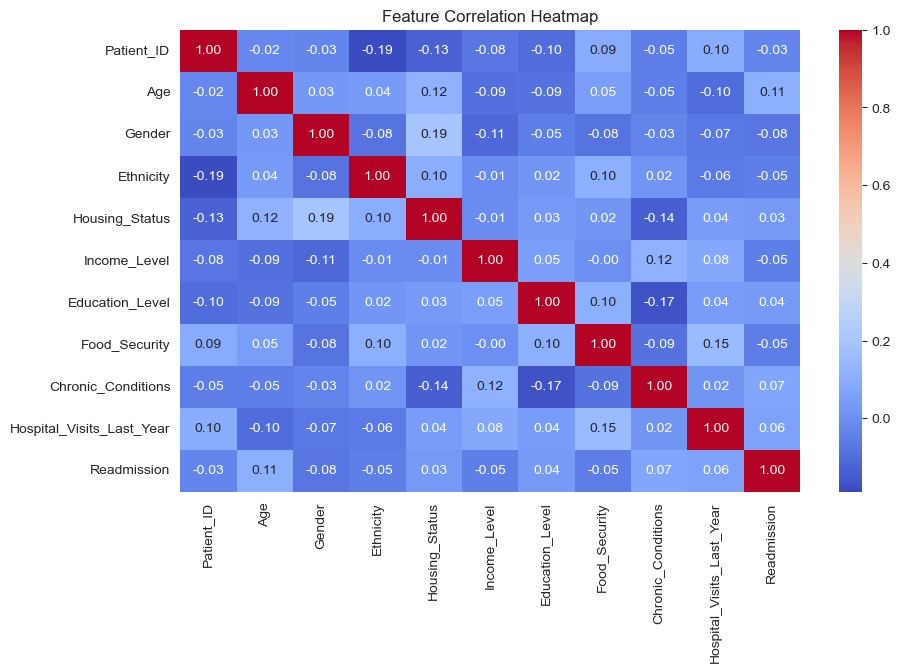

In [14]:
df.drop(columns=['Age_Group'], inplace=True)

#Encode the categorical columns again to avoid errors.
categorical_cols = ['Gender', 'Ethnicity', 'Housing_Status', 'Income_Level', 'Education_Level', 'Food_Security']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

correlation_matrix = df.corr()

# Sort correlations with Readmission.
readmission_correlation = correlation_matrix['Readmission'].sort_values(ascending=False)
print("\nCorrelation of Features with Readmission:\n", readmission_correlation)

# Visualise correlations in a heatmap matrix.
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#### Random Forest Model


The Feature Importance can be seen in the table below:
 Age                          0.217201
Hospital_Visits_Last_Year    0.152398
Chronic_Conditions           0.143728
Ethnicity                    0.113763
Education_Level              0.088947
Housing_Status               0.082418
Gender                       0.076296
Income_Level                 0.074726
Food_Security                0.050522
dtype: float64


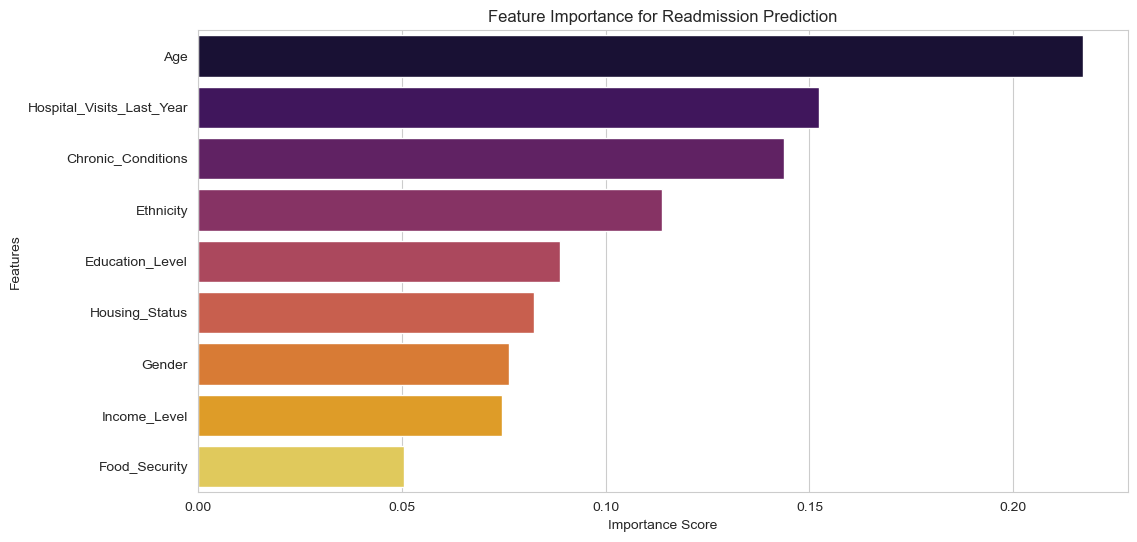

In [16]:
X = df.drop(columns=['Readmission', 'Patient_ID'])  # Remove non-informative ID column and the readmission column used as the target feature.
y = df['Readmission']

# Split Data into test and train.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Train the Random Forest Model.
rf_model = RandomForestClassifier(n_estimators=100, random_state=30)
rf_model.fit(X_train, y_train)

# Sort the Feature Importance.
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nThe Feature Importance can be seen in the table below:\n", feature_importance)

# Visualising the Feature Importance.
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, hue=feature_importance.index, palette="inferno", legend=False)
plt.title("Feature Importance for Readmission Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## Feature engineering

In [18]:
# Create/ Or recreate the dropped Age Group feature.
df['Age_Groups'] = pd.cut(df['Age'], bins=[0, 17, 24, 60, 120], labels=['Minors','Young adults','Adults', 'Elderly/Senior'])

# Chronic condition count. A person with higher chronic conditions will likely get admitted more frequently.
df['Chronic_Condition_Count'] = (df['Chronic_Conditions'] > 3).astype(int)

# Financial Struggle includes income, housing and food security.
df['Financial_Struggle'] = (
    (df['Income_Level'] == 'Low') 
    & (
        (df['Housing_Status'] == 'Homeless') 
        | (df['Food_Security'] == 'Insecure') 
        | (df['Education_Level'] == 'Less than high school')
    )
).astype(int)

#Create a feature combining ethnicity and gender.
df['Ethnicity_Gender_Group'] = (df['Ethnicity'] * 2) + (df['Gender'])

# Convert the categorical features in the newly create feature Age group into numerical values.
categorical_cols.append('Age_Groups')
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df

,Patient_ID,Age,Gender,Ethnicity,Housing_Status,Income_Level,Education_Level,Food_Security,Chronic_Conditions,Hospital_Visits_Last_Year,Readmission,Age_Groups,Chronic_Condition_Count,Financial_Struggle,Ethnicity_Gender_Group
0,1,67,1,1,2,0,2,0,5,5,1,1,1,0,3
1,2,63,2,0,1,1,1,0,3,11,1,1,0,0,2
2,3,21,0,4,2,2,1,0,3,8,0,2,0,0,8
3,4,38,2,2,2,0,1,1,1,11,1,0,0,0,6
4,5,42,1,3,1,1,3,0,4,10,0,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,57,0,3,1,0,1,0,2,11,0,0,0,0,6
146,147,39,2,0,1,0,0,0,2,12,1,0,0,0,2
147,148,77,2,0,1,0,2,0,3,9,0,1,0,0,2
148,149,39,2,2,1,2,0,1,5,15,1,0,1,0,6


## Model Evalaution and Development

In [20]:
# Define target variable (Readmission = More than 3 visits).
df['Readmitted'] = (df['Hospital_Visits_Last_Year'] > 3).astype(int)

# Select relevant features.
irrelevant_columns = ['Patient_ID', 'Hospital_Visits_Last_Year', 'Readmitted', 'Readmission', 'Gender', 'Ethnicity', 'Housing_Status', 'Education_Level', 'Income_Level', 'Food_Security']

X = df.drop(columns=irrelevant_columns)
y = df['Readmitted']

# Split Data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head(2)


,Age,Chronic_Conditions,Age_Groups,Chronic_Condition_Count,Financial_Struggle,Ethnicity_Gender_Group
22,43,0,0,0,0,9
15,54,4,0,1,0,9


In [21]:
# Initialise Models.
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

model_results = {}

# Train & Evaluate Models.
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores for ROC-AUC.

    # Compute Metrics.
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    model_results[name] = {"Accuracy": accuracy, "ROC_AUC": roc_auc}

    # Print Metrics.
    print(f"\n{name} Model Performance\n")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")


Logistic Regression Model Performance

Accuracy: 0.6667
Precision: 0.7308
Recall: 0.8636
F1-Score: 0.7917
ROC-AUC Score: 0.4886

Random Forest Model Performance

Accuracy: 0.6000
Precision: 0.7083
Recall: 0.7727
F1-Score: 0.7391
ROC-AUC Score: 0.4205

Gradient Boosting Model Performance

Accuracy: 0.5667
Precision: 0.7143
Recall: 0.6818
F1-Score: 0.6977
ROC-AUC Score: 0.3864


C:\Users\USER\AppData\Local\Temp\ipykernel_2140\2749826805.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_df.index, y=model_df["Accuracy"], palette="viridis", legend=True)


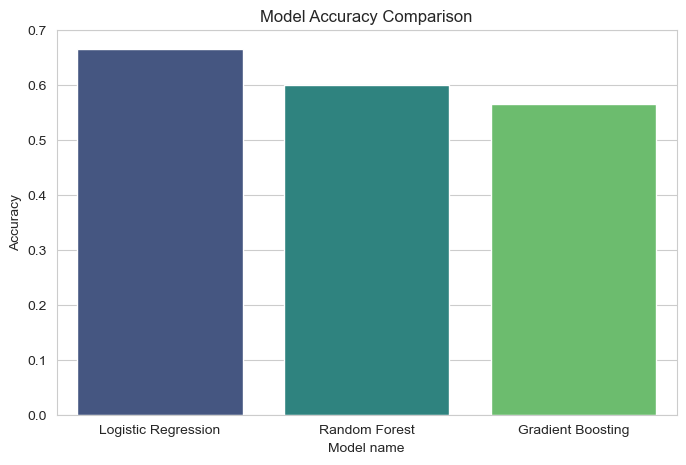

In [22]:
# Compare Model Performance and visualise it.
model_df = pd.DataFrame(model_results).T

plt.figure(figsize=(8, 5))
sns.barplot(x=model_df.index, y=model_df["Accuracy"], palette="viridis", legend=True)
plt.title("Model Accuracy Comparison")
plt.xlabel("Model name")
plt.show()

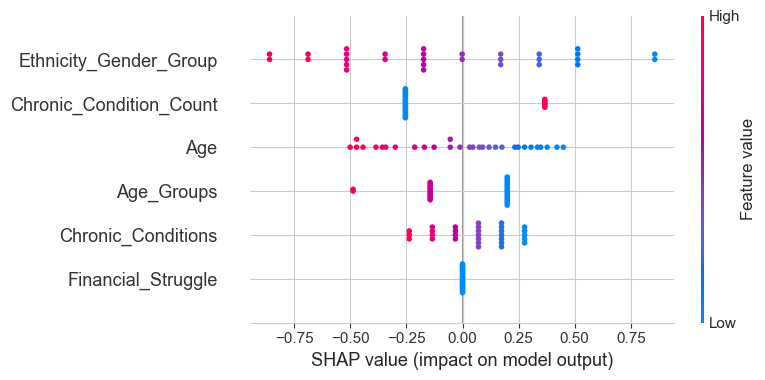

In [23]:
# Choose the best-performing model (Logistic Regression in this case).
best_model = models["Logistic Regression"]

# Use LinearExplainer for Logistic Regression.
explainer = shap.LinearExplainer(best_model, X_train)
shap_values = explainer.shap_values(X_test)

# Visualizing Feature Importance.
shap.summary_plot(shap_values, X_test)
